# Group Project - Machine Intelligence and Society 2023

### Important Notice

<!-- Markdown!!! -->
The project is about basic machine learning methods and fairness in machine learning associated with the Machine Intelligence and Society 2023 course. The members of this group is following:

<!-- Markdown!!! -->
<!-- 각자 파트/student ID/이름 스펠링 확인!! -->

| Matrikelnummer|  Name        | Responsibility    |    Program                                 |
|:-------------:|:------------:|:-----------------:|:------------------------------------------:|
|    03700000   |  Mingi Kang  |   report /        | Bachelor Elektro- und Informationstechnik  |
|    03722924   |  Semin Kim   | analysis / report | Bachelor Elektro- und Informationstechnik  |
|    03700000   |  Seyoung Kim | research / report | Bachelor Elektro- und Informationstechnik  |
|    03745303   | Taeyoung Kim |    programming    | Bachelor Elektro- und Informationstechnik  |


## INTRODUCTION OF THIS PROJECT

The provided dataset is a subset of the [North Carolina Policing Dataset](https://openpolicing.stanford.edu/data/). 
This includes to identify and deal with any outliers, missing values etc. and to encode and scale features appropriately and the task is to classify if a person will be arrested or not. This project consists of a total of 4 modules: preprocessing, training, validation and testing.

## PREPROCESSING 

In [1]:
# 마지막에 필요없는 패키지 삭제
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [2]:
#Read data
df = pd.read_csv("NC_policing.csv")

Check the component of dataset with method info/head/unique

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state               402087 non-null  object 
 1   stop_date           402087 non-null  object 
 2   driver_gender       402087 non-null  object 
 3   driver_age          401996 non-null  float64
 4   driver_race_raw     402087 non-null  object 
 5   driver_race         402087 non-null  object 
 6   violation           402087 non-null  object 
 7   search_type         402087 non-null  object 
 8   contraband_found    402087 non-null  bool   
 9   stop_outcome        402087 non-null  object 
 10  search_basis        402087 non-null  object 
 11  officer_id          402087 non-null  int64  
 12  drugs_related_stop  4379 non-null    object 
 13  district            402049 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 40.3+ MB


,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3


In [4]:
# Show the number of unique values
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

state: 1 unique values
stop_date: 5632 unique values
driver_gender: 2 unique values
driver_age: 83 unique values
driver_race_raw: 10 unique values
driver_race: 5 unique values
violation: 8 unique values
search_type: 6 unique values
contraband_found: 2 unique values
stop_outcome: 2 unique values
search_basis: 33 unique values
officer_id: 3018 unique values
drugs_related_stop: 1 unique values
district: 57 unique values


In [5]:
#Check the unique values of all data.
for col in df:
    print(df[col].unique())

['NC']
['2000-07-31' '2000-08-01' '2000-08-02' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
['M' 'F']
[23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. nan
 82. 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]
['W N' 'B N' 'U H' 'W H' 'I N' 'U N' 'A N' 'A H' 'B H' 'I H']
['White' 'Black' 'Hispanic' 'Other' 'Asian']
['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop sign/light']
['No Search Conducted' 'Protective Frisk' 'Incident to Arrest' 'Consent'
 'Probable Cause' 'Warrant']
[False  True]
['Arrest' 'No Action']
['No Search Conducted' 'Observation Suspected Contraband'
 'Erratic Suspicious Behaviour' 'Other Official Info'
 'Suspicious Movement' 'Witness Observation' 'Informant Tip'
 'Observation Suspected Contr

### Processing the missing values

In [6]:
#Fill missing values in 'drivers_age' with mean
mean_age = df['driver_age'].mean()
print("Average age is :", mean_age)

Average age is : 41.878103264709104


In [7]:
#All missing values in 'driver_age' fills with average mean
#It was rounded at 소수첫째자리 반올림
df['driver_age'] = df['driver_age'].fillna(int(np.rint(mean_age)))


'''
Fill missing values in 'drugs_related_stop' feature with false values
because 차 수색해서 차에서 마약이 나올 확률이 안나올 확률보다 낮다
df['drugs_related_stop'] = df['drugs_related_stop'].fillna(False)
'''
#Check ob tere are antother missing values
df.isna().sum()

state                      0
stop_date                  0
driver_gender              0
driver_age                 0
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397708
district                  38
dtype: int64

In [8]:

# only 38 data missed, = keinen Einfluss auf dataset
df.dropna(subset=['district'], inplace=True)

#Check ob tere are antother missing values
df.isna().sum()

state                      0
stop_date                  0
driver_gender              0
driver_age                 0
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397670
district                   0
dtype: int64

### 데이터 정리하기(필요한 데이터/불필요데이터 처리, ml위해 데이터 폼 변형etc)

삭제할 컬럼(사용되지 않음) : state, stop_date, driver_race_raw, contraband_found, drug_related_stop, district 혹은 officer_id 둘 중 하나(아직 결정 못함 두 컬럼이 비슷한 관계..)
처리 후 필요최소한 사용 컬럼 : violation, search_type

state : 모든 컬럼 동일값 => ml에 큰 의미x
stop_date : 데이터가 너무 광범위하고, ....
driver_race_raw : dirver_race 컬럼과 유사하다
contraband_found : stop_outcome인 y variable과 유사하다.
drug_related_stop : 너무 많은 값이 빠져있어서 데이터로서의 가치 없음.



In [9]:
df_encoded = df.copy()
# Convert 'stop_date' to datetime format
df_encoded['stop_date'] = pd.to_datetime(df_encoded['stop_date'])

# Extract year, month, day, and day of the week
df_encoded['year'] = df_encoded['stop_date'].dt.year
df_encoded['month'] = df_encoded['stop_date'].dt.month
df_encoded['day'] = df_encoded['stop_date'].dt.day
df_encoded['day_of_week'] = df_encoded['stop_date'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original 'stop_date' column 
df_encoded = df_encoded.drop('stop_date', axis=1)

# Check the dataset of df_encoded
df_encoded.head()

,state,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district,year,month,day,day_of_week
0,NC,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3,2000,7,31,0
1,NC,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3,2000,7,31,0
2,NC,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3,2000,7,31,0
3,NC,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3,2000,7,31,0
4,NC,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3,2000,7,31,0


그래프 둘 중 하나 선택하면 될듯

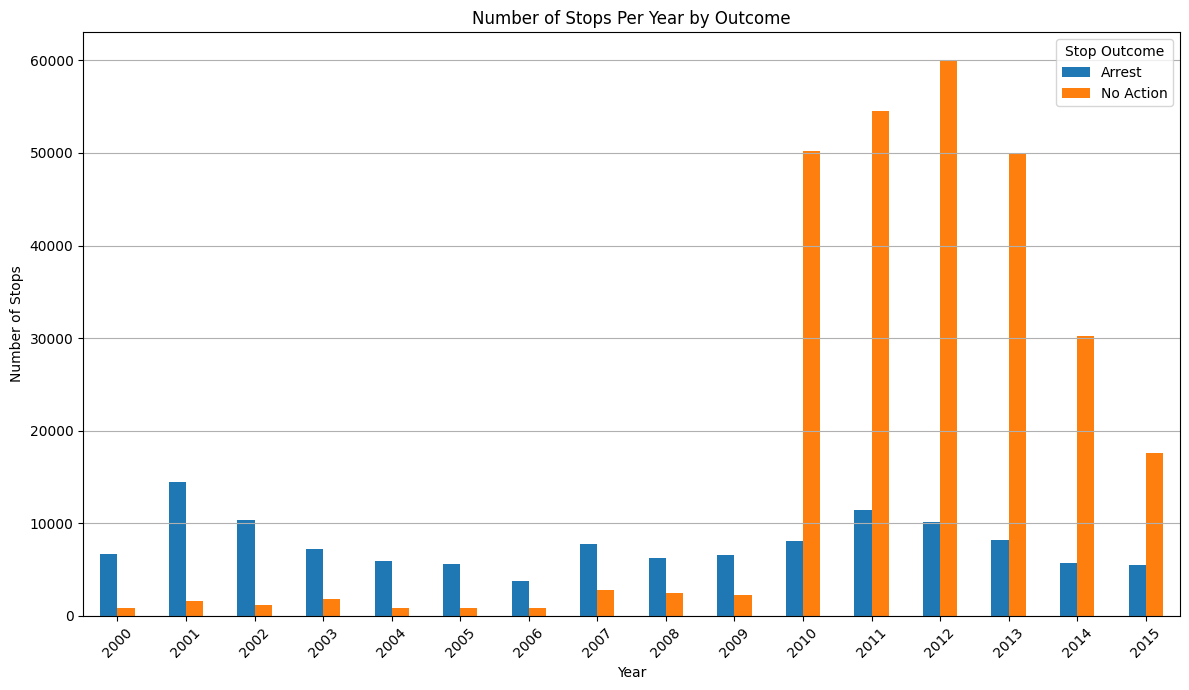

In [10]:
# year ~ stop outcome relation ship

# Group by year and stop_outcome and count the occurrences
grouped = df_encoded.groupby(['year', 'stop_outcome']).size().unstack().fillna(0)

# Plot the data using grouped bar graph
grouped.plot(kind='bar', figsize=(12,7))
plt.title('Number of Stops Per Year by Outcome')
plt.xlabel('Year')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Stop Outcome')
plt.show()

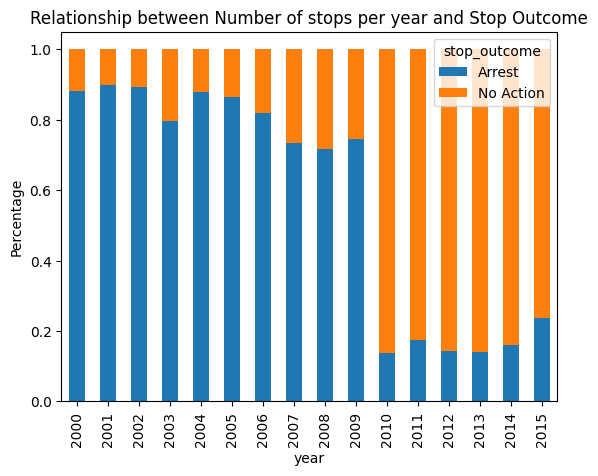

In [11]:
# Plot for Relationship between Number of stops per year and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['year'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per year and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

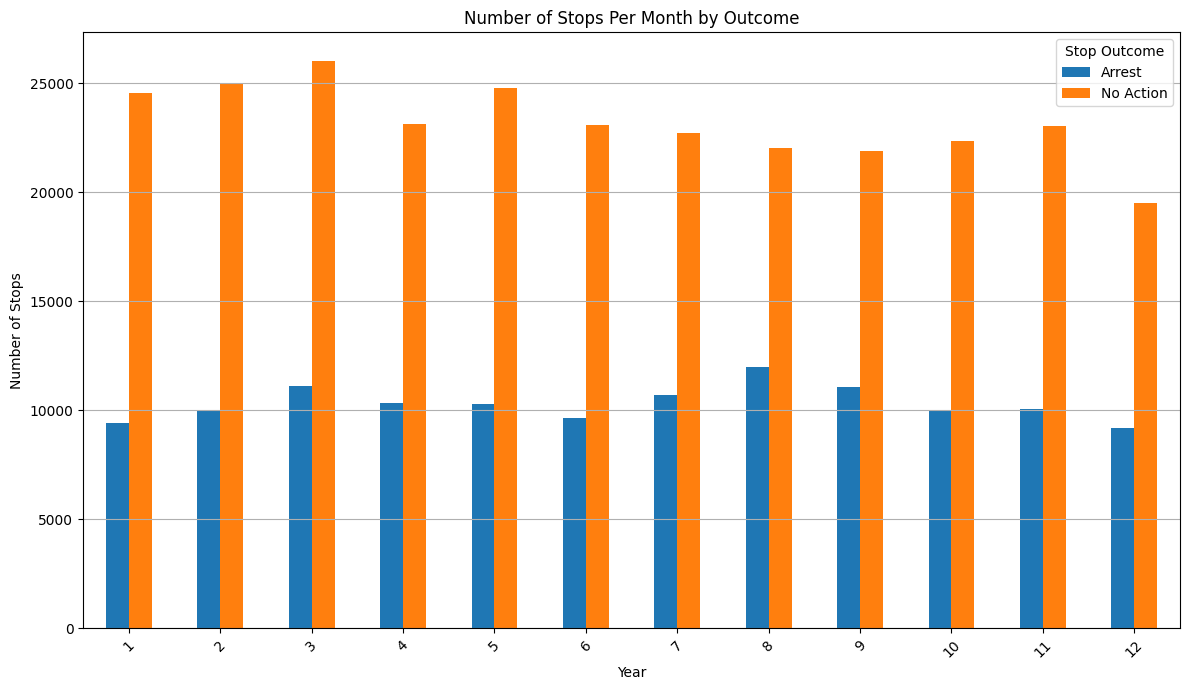

In [12]:
# month ~ stop outcome relation ship

# Group by year and stop_outcome and count the occurrences
grouped = df_encoded.groupby(['month', 'stop_outcome']).size().unstack().fillna(0)

# Plot the data using grouped bar graph
grouped.plot(kind='bar', figsize=(12,7))
plt.title('Number of Stops Per Month by Outcome')
plt.xlabel('Year')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Stop Outcome')
plt.show()

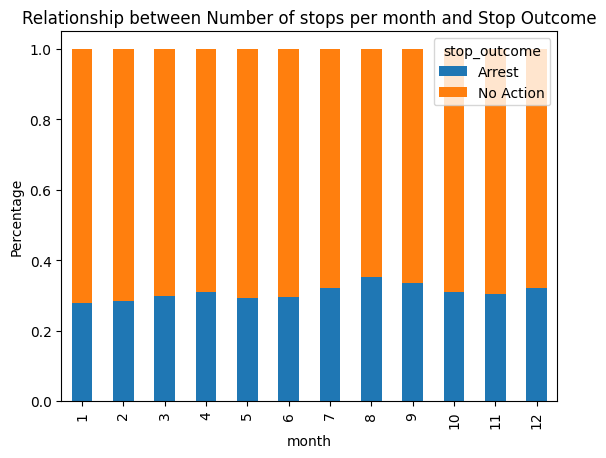

In [13]:
## 별다른 경향성이 없음 = 삭제 가능 컬럼

# Plot for Relationship between Number of stops per month and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['month'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per month and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

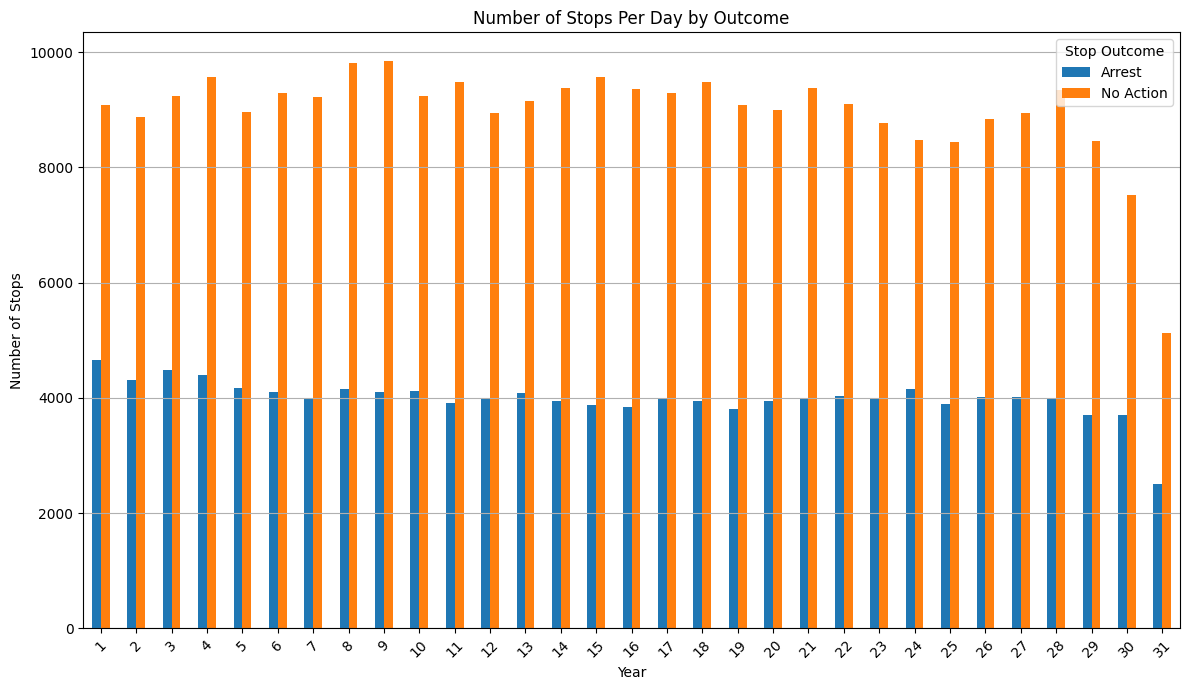

In [14]:
# day ~ stop outcome relation ship

# Group by year and stop_outcome and count the occurrences
grouped = df_encoded.groupby(['day', 'stop_outcome']).size().unstack().fillna(0)

# Plot the data using grouped bar graph
grouped.plot(kind='bar', figsize=(12,7))
plt.title('Number of Stops Per Day by Outcome')
plt.xlabel('Year')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Stop Outcome')
plt.show()

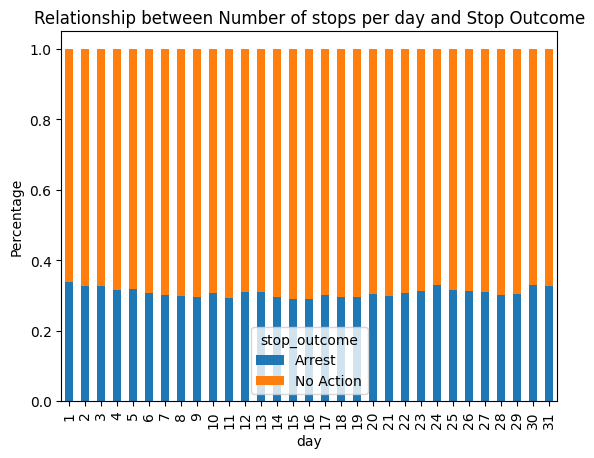

In [15]:
## 별다른 경향성이 없음 = 삭제 가능 컬럼

# Plot for Relationship between Number of stops per day and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['day'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True)
plt.title('Relationship between Number of stops per day and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

# *협의 필요 : 요일-체포 경향성 그래프

## **주말 검문

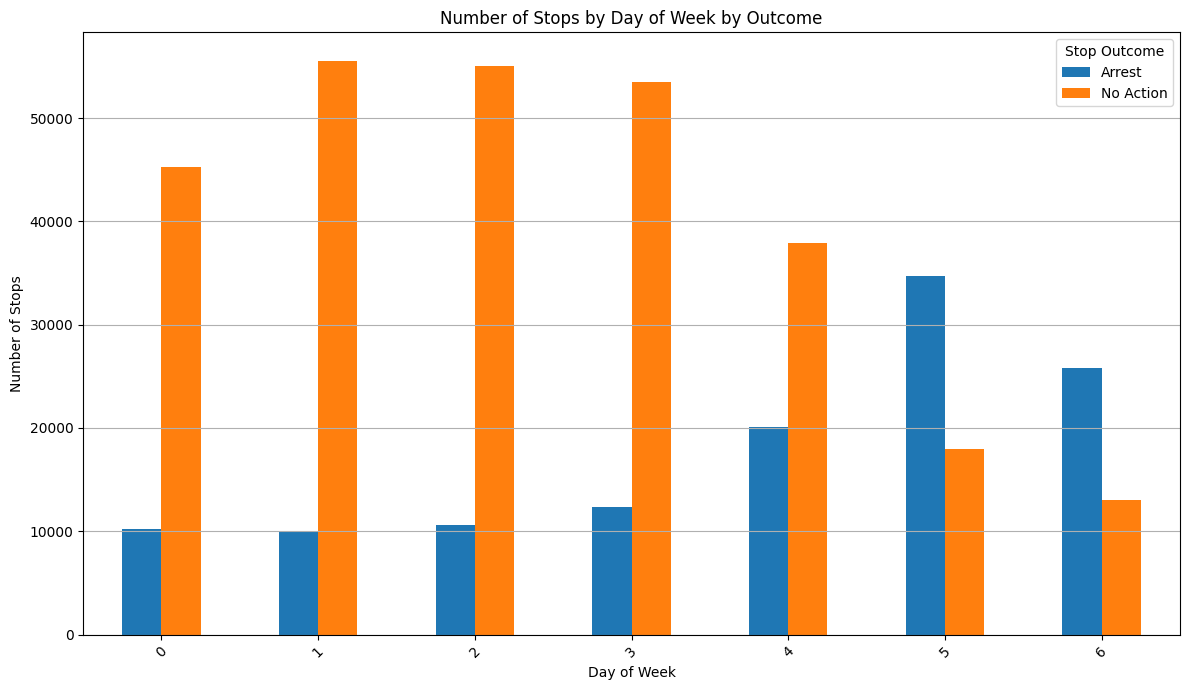

In [16]:
# day_of_week ~ stop outcome relation ship

# Group by year and stop_outcome and count the occurrences
grouped = df_encoded.groupby(['day_of_week', 'stop_outcome']).size().unstack().fillna(0)

# Plot the data using grouped bar graph
grouped.plot(kind='bar', figsize=(12,7))
plt.title('Number of Stops by Day of Week by Outcome')
plt.xlabel('Day of Week')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Stop Outcome')
plt.show()

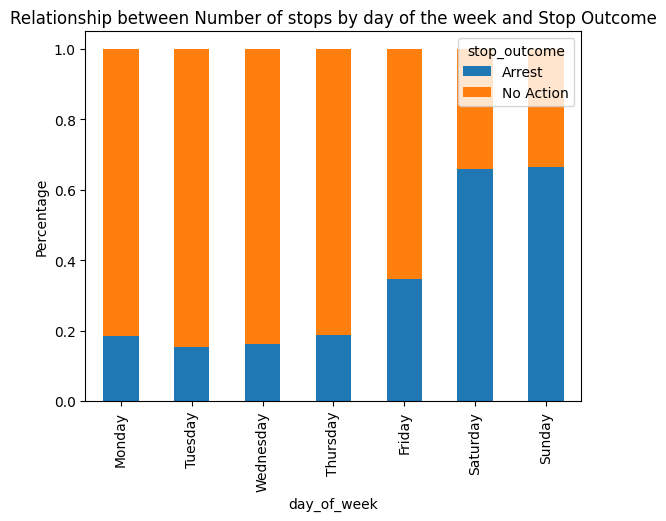

In [17]:
# 경향성은 있을수도...? 협의 사항

# Plot for Relationship between Number of stops by day of the week and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['day_of_week'], df_encoded['stop_outcome'], normalize='index')

# Plot of day of week and stop outcome
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crosstab_normalized.plot(kind='bar', stacked=True)
plt.xticks(ticks=np.arange(7), labels=days)
plt.title('Relationship between Number of stops by day of the week and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

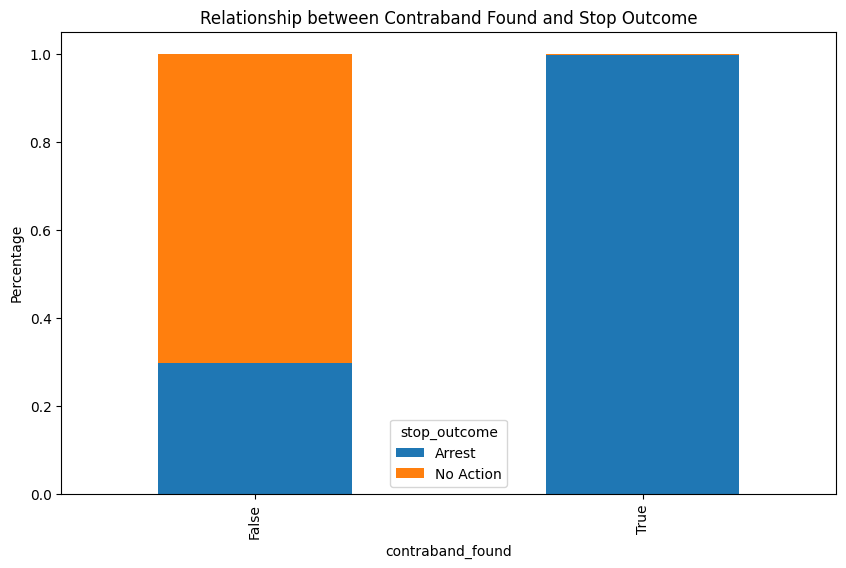

In [18]:
# contraband_found 컬럼이 true 일때는 100% Arrest 임을 보여주는 그래프

# Plot for Relationship between Contraband Found and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['contraband_found'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Contraband Found and Stop Outcome')
plt.ylabel('Percentage')
plt.show()


# *협의 필요 : Violation

## **Stop sign/light

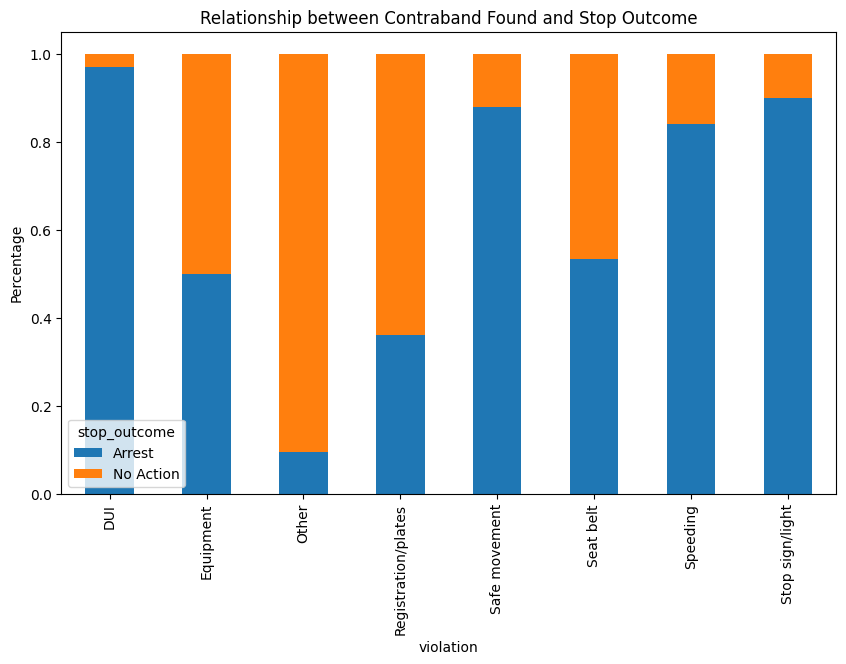

In [19]:
# 그래프를 보면 DUI는 Arrest와 경향성 비슷 / Other는 No Action과 비슷.

# Plot for Relationship between Violation and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['violation'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Contraband Found and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

# *협의 필요 : Race

## **Hispanic 데이터

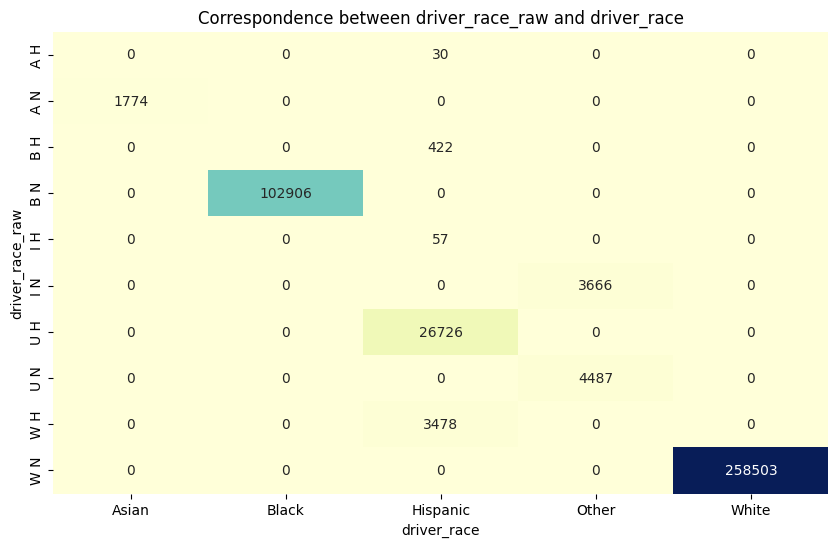

In [20]:
# HEAT MAP

# Cross-tabulation
ct = pd.crosstab(df_encoded['driver_race_raw'], df_encoded['driver_race'])

# Visualize with a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title('Correspondence between driver_race_raw and driver_race')
plt.show()


In [21]:
df_encoded['driver_race'].count()

402049

In [22]:
count_hispanic = df_encoded['driver_race'].value_counts()['Hispanic']
print(f"Number of occurrences of 'Hispanic' in the 'driver_race' column: {count_hispanic}")

Number of occurrences of 'Hispanic' in the 'driver_race' column: 30713


In [23]:
30+422+57+26726+3478

30713

In [24]:
# search_type 컬럼을 one-hot encoding후 새로 생성되는 
# search_type_No Search Conducted 컬럼이
# 0일 때(검색이 수행되지 않지 않다 == 검문을 했다)는 100% Arrest 임을 보여주는 그래프

# One-hot encoding for 'search_type'
dummies = pd.get_dummies(df_encoded['search_type'], prefix='search_type')

# Concatenate the one-hot encoded columns to df_encoded
df_encoded = pd.concat([df_encoded, dummies], axis=1)

# Drop the original 'search_type' column
df_encoded = df_encoded.drop('search_type', axis=1)



In [25]:
df_encoded.head()  # 삭제 가능!!!

,state,driver_gender,driver_age,driver_race_raw,driver_race,violation,contraband_found,stop_outcome,search_basis,officer_id,...,year,month,day,day_of_week,search_type_Consent,search_type_Incident to Arrest,search_type_No Search Conducted,search_type_Probable Cause,search_type_Protective Frisk,search_type_Warrant
0,NC,M,23.0,W N,White,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
1,NC,F,29.0,W N,White,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
2,NC,F,49.0,B N,Black,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
3,NC,M,29.0,B N,Black,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
4,NC,M,24.0,U H,Hispanic,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0


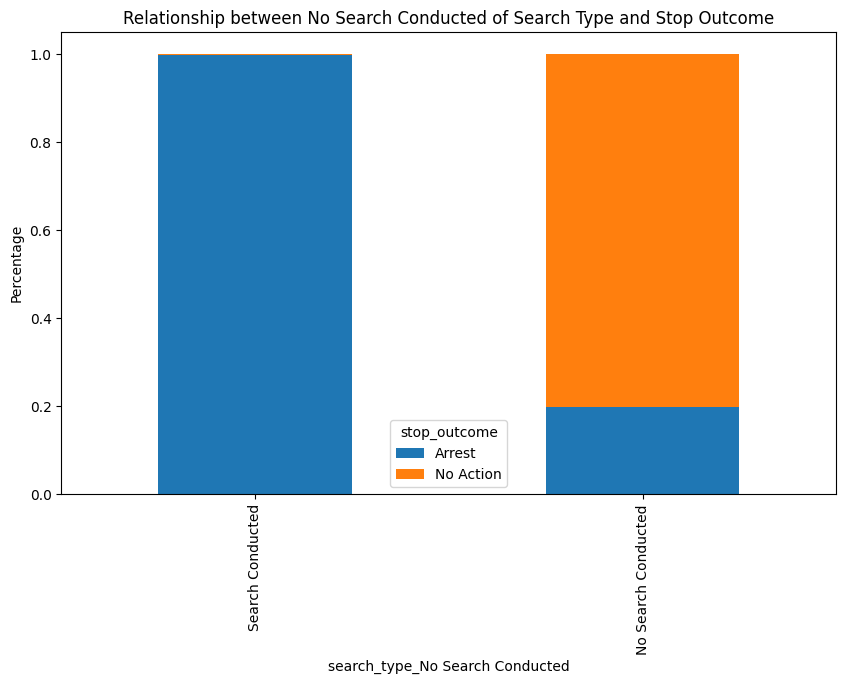

In [26]:
# search_type 컬럼을 one-hot encoding후 새로 생성되는 
# search_type_No Search Conducted 컬럼이
# 0일 때(검색이 수행되지 않지 않다 == 검문을 했다)는 100% Arrest 임을 보여주는 그래프

# Plot for Relationship between Contraband Found and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['search_type_No Search Conducted'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
outcome = ['Search Conducted', 'No Search Conducted']
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(ticks=np.arange(2), labels=outcome)
plt.title('Relationship between No Search Conducted of Search Type and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

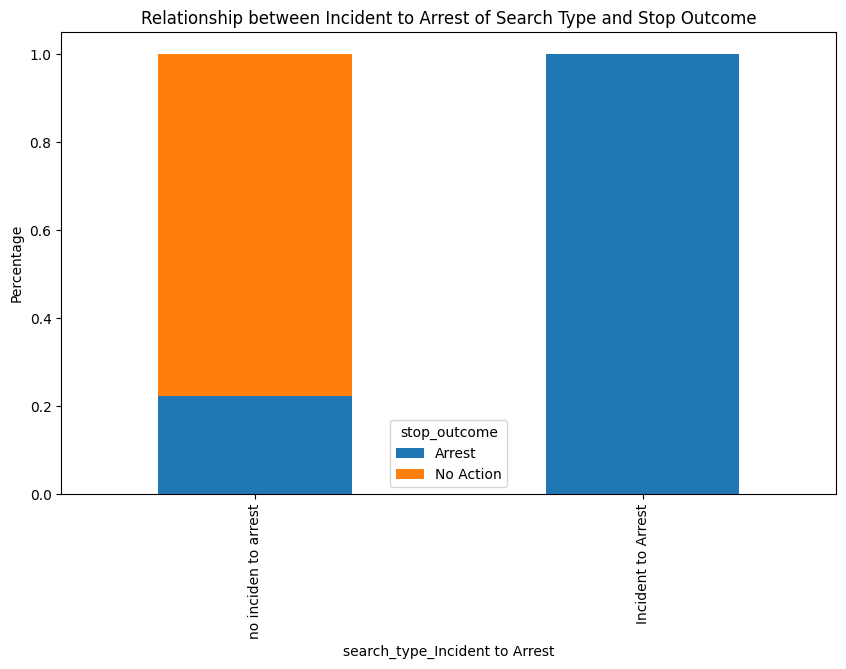

In [27]:
# search_type 컬럼을 one-hot encoding후 새로 생성되는 
# search_type_Incident to Arrest 컬럼이
# 1일 때(체포되었음)는 100% Arrest 임을 보여주는 그래프

# Plot for Relationship between Contraband Found and Stop Outcome

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_encoded['search_type_Incident to Arrest'], df_encoded['stop_outcome'], normalize='index')

# Plot a stacked bar chart
outcome = ['no inciden to arrest','Incident to Arrest']
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(ticks=np.arange(2), labels=outcome)
plt.title('Relationship between Incident to Arrest of Search Type and Stop Outcome')
plt.ylabel('Percentage')
plt.show()

In [28]:
### officer_id 컬럼에 district 컬럼의 정보가 들어 있는지 확인하기 위한 분류 작업
### 분류된 데이터를 시각화(그래프로 그리기)

# Group by district and count officer_id's for each district
summary = df_encoded.groupby('district')['officer_id'].nunique()

# Convert to a DataFrame 
summary_df = summary.reset_index()

# Sorting Values
summary_df = summary_df.sort_values(by='officer_id', ascending=False)
print(summary_df)

   district  officer_id
19       C3         323
55       H5         253
22       C6         245
14       B6         216
42       F4         195
26       D2         182
17       C1         179
23       C7         176
35       E4         168
32       E1         166
16       B8         165
43       F5         160
3        A4         157
13       B5         156
47       G4         155
34       E3         154
15       B7         152
4        A5         151
29       D5         147
36       E5         142
53       H3         141
46       G3         140
20       C4         139
9        B1         137
2        A3         135
24       C8         132
51       H1         130
5        A6         130
7        A8         128
49       G6         128
33       E2         124
0        A1         123
21       C5         123
12       B4         123
31       D7         121
48       G5         118
18       C2         118
45       G2         117
30       D6         116
44       G1         112
52       H2     

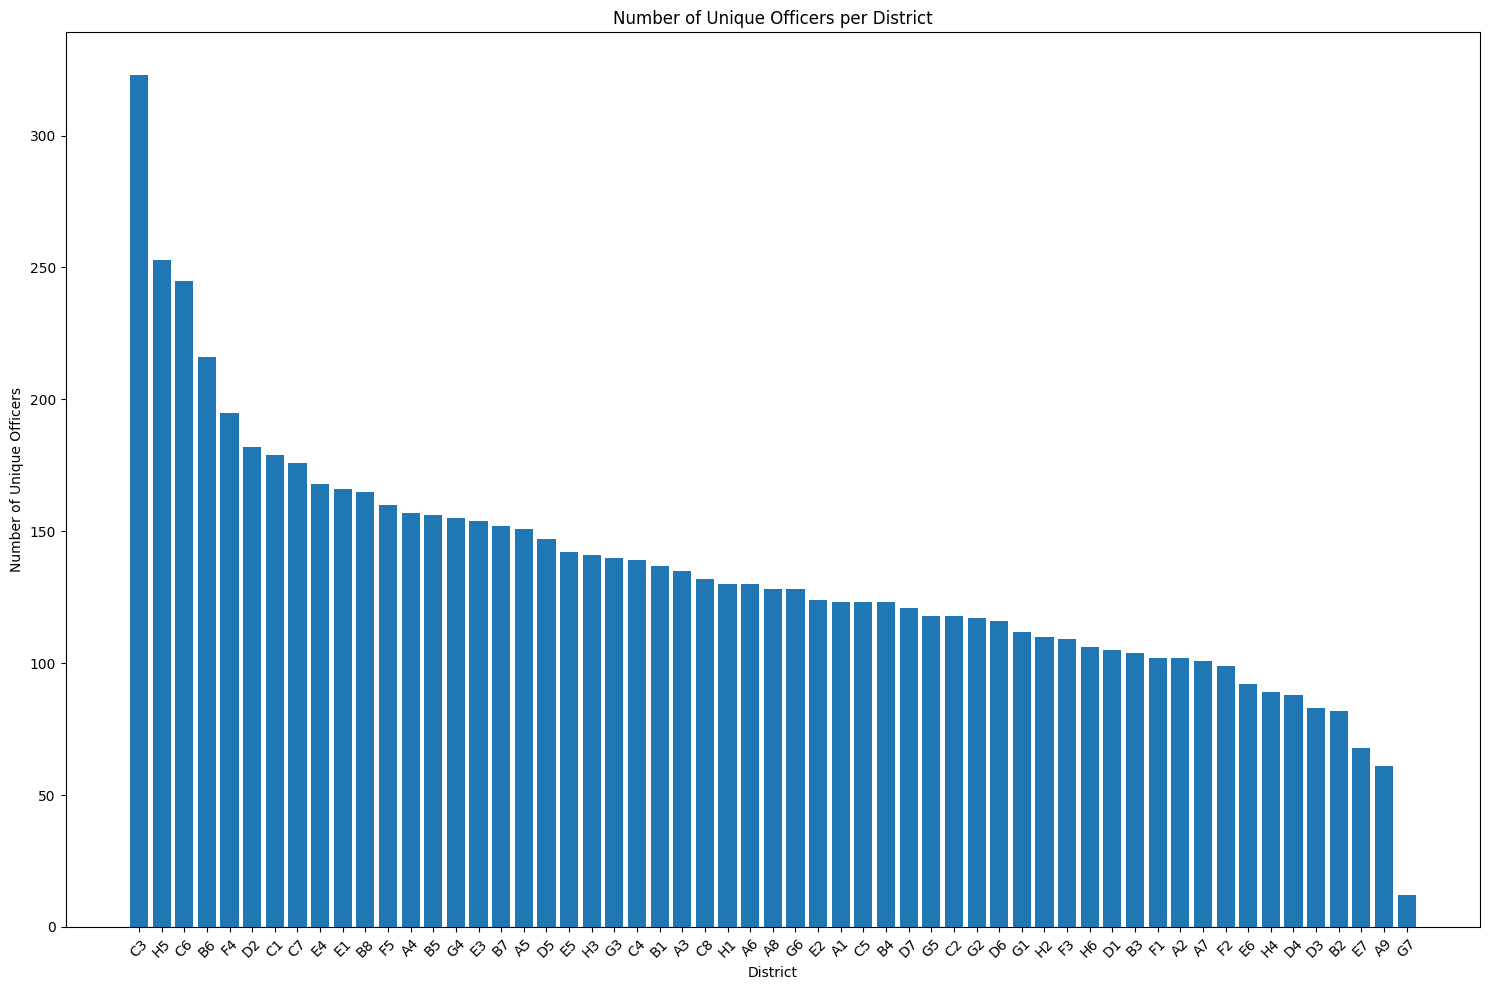

In [29]:
### officer_id 컬럼에 district 컬럼의 정보가 들어 있는지 확인하기 위한 분류 작업
### 분류된 데이터를 시각화(그래프로 그리기)


plt.figure(figsize=(15,10))
plt.bar(summary_df['district'], summary_df['officer_id'])
plt.xlabel('District')
plt.ylabel('Number of Unique Officers')
plt.title('Number of Unique Officers per District')
plt.xticks(rotation=45) # ticks rotate
plt.tight_layout()
plt.show()


# Seat belt, other row 삭제

In [30]:
count_seat_belt_other = df_encoded['violation'].value_counts()[['Seat belt', 'Other']]
print(f"Number of occurrences of 'seat belt' and 'other' in the 'violation' column: {count_seat_belt_other}")

Number of occurrences of 'seat belt' and 'other' in the 'violation' column: Seat belt     11017
Other        280809
Name: violation, dtype: int64


In [31]:
df_encoded['violation'].unique()

array(['Speeding', 'DUI', 'Equipment', 'Seat belt', 'Other',
       'Registration/plates', 'Safe movement', 'Stop sign/light'],
      dtype=object)

In [32]:
values_to_remove = ['Seat belt', 'Other']
filtered_df = df_encoded[~df_encoded['violation'].isin(values_to_remove)]
filtered_df

,state,driver_gender,driver_age,driver_race_raw,driver_race,violation,contraband_found,stop_outcome,search_basis,officer_id,...,year,month,day,day_of_week,search_type_Consent,search_type_Incident to Arrest,search_type_No Search Conducted,search_type_Probable Cause,search_type_Protective Frisk,search_type_Warrant
0,NC,M,23.0,W N,White,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
1,NC,F,29.0,W N,White,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
2,NC,F,49.0,B N,Black,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
3,NC,M,29.0,B N,Black,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
4,NC,M,24.0,U H,Hispanic,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402080,NC,F,49.0,W N,White,Speeding,False,Arrest,Erratic Suspicious Behaviour,21513,...,2015,12,31,3,0,1,0,0,0,0
402081,NC,M,37.0,B N,Black,Speeding,False,Arrest,Other Official Info,21443,...,2015,12,31,3,0,1,0,0,0,0
402082,NC,M,18.0,W N,White,Speeding,True,Arrest,Observation Suspected Contraband,21715,...,2015,12,31,3,0,0,0,1,0,0
402083,NC,F,21.0,B N,Black,Registration/plates,False,Arrest,Other Official Info,10592,...,2015,12,31,3,0,1,0,0,0,0


In [33]:
df_encoded['violation'].count()

402049

# 협의된 Column 삭제

## state, driver_race_raw, contraband_found, drugs_related_stop

In [34]:
df_encoded

,state,driver_gender,driver_age,driver_race_raw,driver_race,violation,contraband_found,stop_outcome,search_basis,officer_id,...,year,month,day,day_of_week,search_type_Consent,search_type_Incident to Arrest,search_type_No Search Conducted,search_type_Probable Cause,search_type_Protective Frisk,search_type_Warrant
0,NC,M,23.0,W N,White,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
1,NC,F,29.0,W N,White,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
2,NC,F,49.0,B N,Black,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
3,NC,M,29.0,B N,Black,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
4,NC,M,24.0,U H,Hispanic,Speeding,False,Arrest,No Search Conducted,10606,...,2000,7,31,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402082,NC,M,18.0,W N,White,Speeding,True,Arrest,Observation Suspected Contraband,21715,...,2015,12,31,3,0,0,0,1,0,0
402083,NC,F,21.0,B N,Black,Registration/plates,False,Arrest,Other Official Info,10592,...,2015,12,31,3,0,1,0,0,0,0
402084,NC,F,29.0,W N,White,Speeding,False,Arrest,Observation Suspected Contraband,21848,...,2015,12,31,3,0,1,0,0,0,0
402085,NC,F,18.0,W N,White,Other,True,Arrest,Observation Suspected Contraband,11887,...,2015,12,31,3,0,0,0,1,0,0


In [37]:
filtered_df_encoded = df_encoded.drop(columns=['state', 'driver_race_raw', 'contraband_found', 'drugs_related_stop'])
filtered_df_encoded

,driver_gender,driver_age,driver_race,violation,stop_outcome,search_basis,officer_id,district,year,month,day,day_of_week,search_type_Consent,search_type_Incident to Arrest,search_type_No Search Conducted,search_type_Probable Cause,search_type_Protective Frisk,search_type_Warrant
0,M,23.0,White,Speeding,Arrest,No Search Conducted,10606,E3,2000,7,31,0,0,0,1,0,0,0
1,F,29.0,White,Speeding,Arrest,No Search Conducted,10606,E3,2000,7,31,0,0,0,1,0,0,0
2,F,49.0,Black,Speeding,Arrest,No Search Conducted,10606,E3,2000,7,31,0,0,0,1,0,0,0
3,M,29.0,Black,Speeding,Arrest,No Search Conducted,10606,E3,2000,7,31,0,0,0,1,0,0,0
4,M,24.0,Hispanic,Speeding,Arrest,No Search Conducted,10606,E3,2000,7,31,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402082,M,18.0,White,Speeding,Arrest,Observation Suspected Contraband,21715,G3,2015,12,31,3,0,0,0,1,0,0
402083,F,21.0,Black,Registration/plates,Arrest,Other Official Info,10592,G5,2015,12,31,3,0,1,0,0,0,0
402084,F,29.0,White,Speeding,Arrest,Observation Suspected Contraband,21848,E1,2015,12,31,3,0,1,0,0,0,0
402085,F,18.0,White,Other,Arrest,Observation Suspected Contraband,11887,F5,2015,12,31,3,0,0,0,1,0,0


# search_type : No search Conducted, Incident to arrest만 포함

In [40]:
### Remove all columns of search_type 
### without 'search_type_No Search Conducted' and
### and 'search_type_Incident to Arrest'

value_to_keep = ['search_type_No Search Conducted', 'search_type_Incident to Arrest']
cols_to_keep = [col for col in df_encoded.columns if "No Search Conducted" in col or "Incident to Arrest" in col or (col not in value_to_keep and "search_type" not in col)]
filtered_df_encoded = df_encoded[cols_to_keep]

filtered_df_encoded

,state,driver_gender,driver_age,driver_race_raw,driver_race,violation,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district,year,month,day,day_of_week,search_type_Incident to Arrest,search_type_No Search Conducted
0,NC,M,23.0,W N,White,Speeding,False,Arrest,No Search Conducted,10606,NaN,E3,2000,7,31,0,0,1
1,NC,F,29.0,W N,White,Speeding,False,Arrest,No Search Conducted,10606,NaN,E3,2000,7,31,0,0,1
2,NC,F,49.0,B N,Black,Speeding,False,Arrest,No Search Conducted,10606,NaN,E3,2000,7,31,0,0,1
3,NC,M,29.0,B N,Black,Speeding,False,Arrest,No Search Conducted,10606,NaN,E3,2000,7,31,0,0,1
4,NC,M,24.0,U H,Hispanic,Speeding,False,Arrest,No Search Conducted,10606,NaN,E3,2000,7,31,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402082,NC,M,18.0,W N,White,Speeding,True,Arrest,Observation Suspected Contraband,21715,True,G3,2015,12,31,3,0,0
402083,NC,F,21.0,B N,Black,Registration/plates,False,Arrest,Other Official Info,10592,NaN,G5,2015,12,31,3,1,0
402084,NC,F,29.0,W N,White,Speeding,False,Arrest,Observation Suspected Contraband,21848,NaN,E1,2015,12,31,3,1,0
402085,NC,F,18.0,W N,White,Other,True,Arrest,Observation Suspected Contraband,11887,True,F5,2015,12,31,3,0,0


In [ ]:
#Remove unnecessary columns 사용되지 않을 컬럼, y variable 삭제 'officer_id'
df_encoded = df_encoded.drop(['state','stop_date','driver_race_raw','contraband_found','drug_related_stop','district'], axis=1)

# 위 코드 혹은 아래 코드 둘 중 하나만.
#df_encoded = df_encoded.drop(['state','stop_date','driver_race_raw','contraband_found','drug_related_stop','officer_id'], axis=1)

### Encoding

we cannot work with object Dtype. So we need to change the Dtype as numeric values.


In [ ]:
#Copy dataset to make a encoded data.
df_encoded = df.copy()

#Remove unnecessary columns 사용되지 않을 컬럼, y variable 삭제
df_encoded = df_encoded.drop(['state','driver_race_raw','district','officer_id'], axis=1)
# driver_race_raw :'driver_race'랑 비슷한 데이터셋
# state : every search happend in NC state
# district and officer_id : will not be used for ML



# Label encoding 
encoder = LabelEncoder()
for col in ['contraband_found','driver_gender', 'drugs_related_stop','stop_outcome','violation','search_basis']:
    df_encoded.loc[:,col] = encoder.fit_transform(df_encoded.loc[:,col])

In [ ]:
df_encoded.head()

#Classify the reason of search 
search_reasons = search_reasons = [
    'No Search Conducted', 'Observation Suspected Contraband', 
    'Erratic Suspicious Behaviour', 'Other Official Info', 
    'Suspicious Movement', 'Witness Observation', 'Informant Tip'
]
# Initialize binary columns for each reason in df_encoded with default value 0
for reason in search_reasons:
    df_encoded[f'search_basis_{reason}'] = 0

# Update these columns in df_encoded based on the 'search_basis' column
for reason in search_reasons:
    df_encoded.loc[df_encoded['search_basis'].str.contains(reason), f'search_basis_{reason}'] = 1

# Drop the original 'search_basis' column from df_encoded
df_encoded = df_encoded.drop('search_basis', axis=1)


#Classify district
dist = ['A', 'B','C','D','E','F']

for district in dist:
    df_encoded[f'district_{district}'] = 0

for district in dist:
    df_encoded.loc[df_encoded['district'].str.contains(district), f'district_{district}'] = 1

df_encoded = df_encoded.drop('district', axis=1)

In [ ]:
# Convert 'stop_date' to datetime format
df_encoded['stop_date'] = pd.to_datetime(df_encoded['stop_date'])

# Extract year, month, day, and day of the week
#df_encoded['year'] = df_encoded['stop_date'].dt.year
#df_encoded['month'] = df_encoded['stop_date'].dt.month
#df_encoded['day'] = df_encoded['stop_date'].dt.day
df_encoded['day_of_week'] = df_encoded['stop_date'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original 'stop_date' column 
df_encoded = df_encoded.drop('stop_date', axis=1)

df_encoded.head()

In [ ]:
# One-hot encoding
# List of columns to be one-hot encoded           'violation'
columns_to_encode = ['search_type', 'driver_race']  # Add more columns as needed

for col in columns_to_encode:
    if col in df_encoded.columns:
        # Generate one-hot encoded columns
        dummies = pd.get_dummies(df_encoded[col], prefix=col)
        
        # Concatenate the one-hot encoded columns to df_encoded
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        
        # Drop the original column
        df_encoded = df_encoded.drop(col, axis=1)



In [ ]:
#각 컬럼이 어떤 type 인지 확인
#df.info()

#Check the unique values of all data.
for col in df_encoded:
    print(df_encoded[col].unique())

In [ ]:
df_encoded.head()

In [ ]:
df_encoded.describe().T

### Generate two binary classifiers using two different methods of your liking and compare their performances against a dummy classifier, which always predicts “not arrested”.

In [ ]:
#Target variable y
y = df_encoded["stop_outcome"]
y_encoded = encoder.fit_transform(y)


In [ ]:
# Splitting Data 
X = df_encoded.drop('stop_outcome', axis=1)
X = X.astype(np.float32) 

y = (df_encoded['stop_outcome'] == "Arrested").astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
X

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape)

### only standardization
### only normalization
### std and norm ?


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

col_names = list(X_train.columns)
# Standardization
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

# Normalization
minmax_scaler = MinMaxScaler()
X_train_normalized = minmax_scaler.fit_transform(X_train_standardized)
X_test_normalized = minmax_scaler.transform(X_test_standardized)


In [ ]:
# convert to DataFrame
# Convert the standardized NumPy array back to a DataFrame
X_train_standardized_df = pd.DataFrame(X_train_standardized, columns=X_train.columns)

# Display the top rows of the standardized DataFrame
print(X_train_standardized_df.head())


In [ ]:
#creating correlation matrix for feature selection
corr = X.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidths=0.1, square=True, annot=True, cmap='YlGnBu',
            linecolor="white", fmt='.2f')
plt.title('Correlation between features')
plt.show()